In [3]:
#!pip3 install wordcloud

In [39]:
import tiktoken
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import matplotlib.pyplot as plt
import re

In [5]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/clovinux/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to /home/clovinux/nltk_data...


Chargement des données

In [8]:
df = pd.read_csv('../training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)


In [9]:
df.rename(columns={0: 'polarity', 1: 'id', 2: 'date', 3: 'query', 4: 'user', 5: 'text'}, inplace= True)
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)
df

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
lab_to_sentiment = {0:"Negative", 2:"Neutre", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]

Text(0.5, 1.0, 'Sentiment Data Distribution')

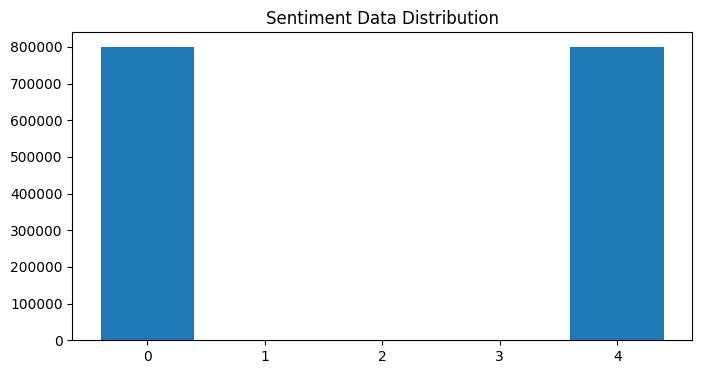

In [12]:
val_count = df.polarity.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

Normalisation

In [13]:
stop_words = stopwords.words('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
wnl = WordNetLemmatizer()

def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip() #tester aussi sans lower pour voir la différence
  tokens = []
  for token in text.split():
    if token not in stop_words:
      tokens.append(wnl.lemmatize(token))
  return " ".join(tokens)

In [14]:
df.text = df.text.apply(lambda x: preprocess(x))

In [15]:
df.head()

,polarity,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save 50 rest go b...
3,0,whole body feel itchy like fire
4,0,behaving mad see


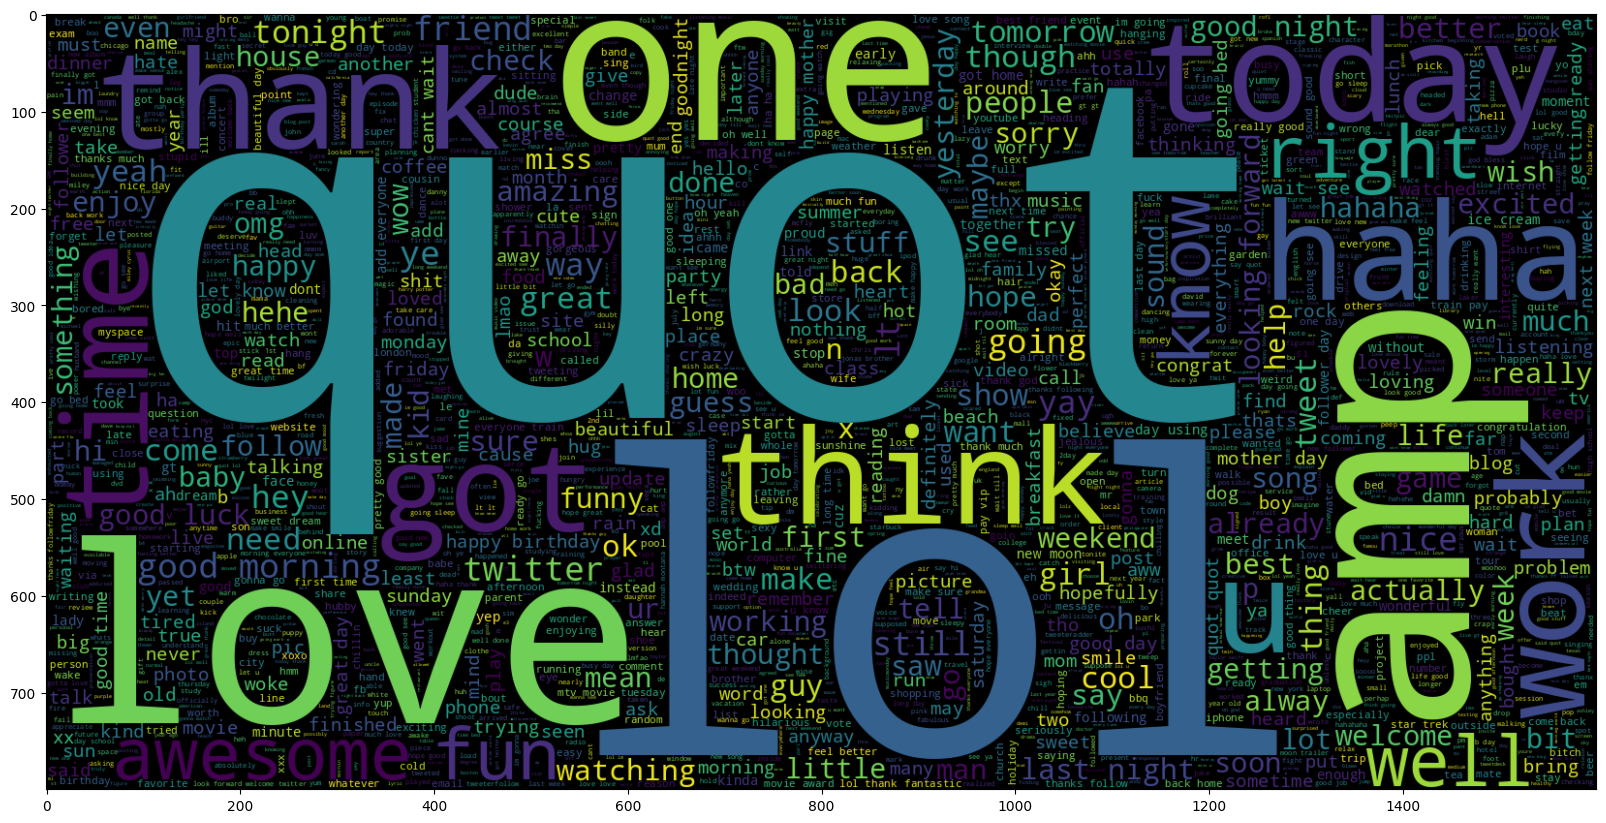

In [16]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.polarity == 4].text))
plt.imshow(wc , interpolation = 'bilinear')

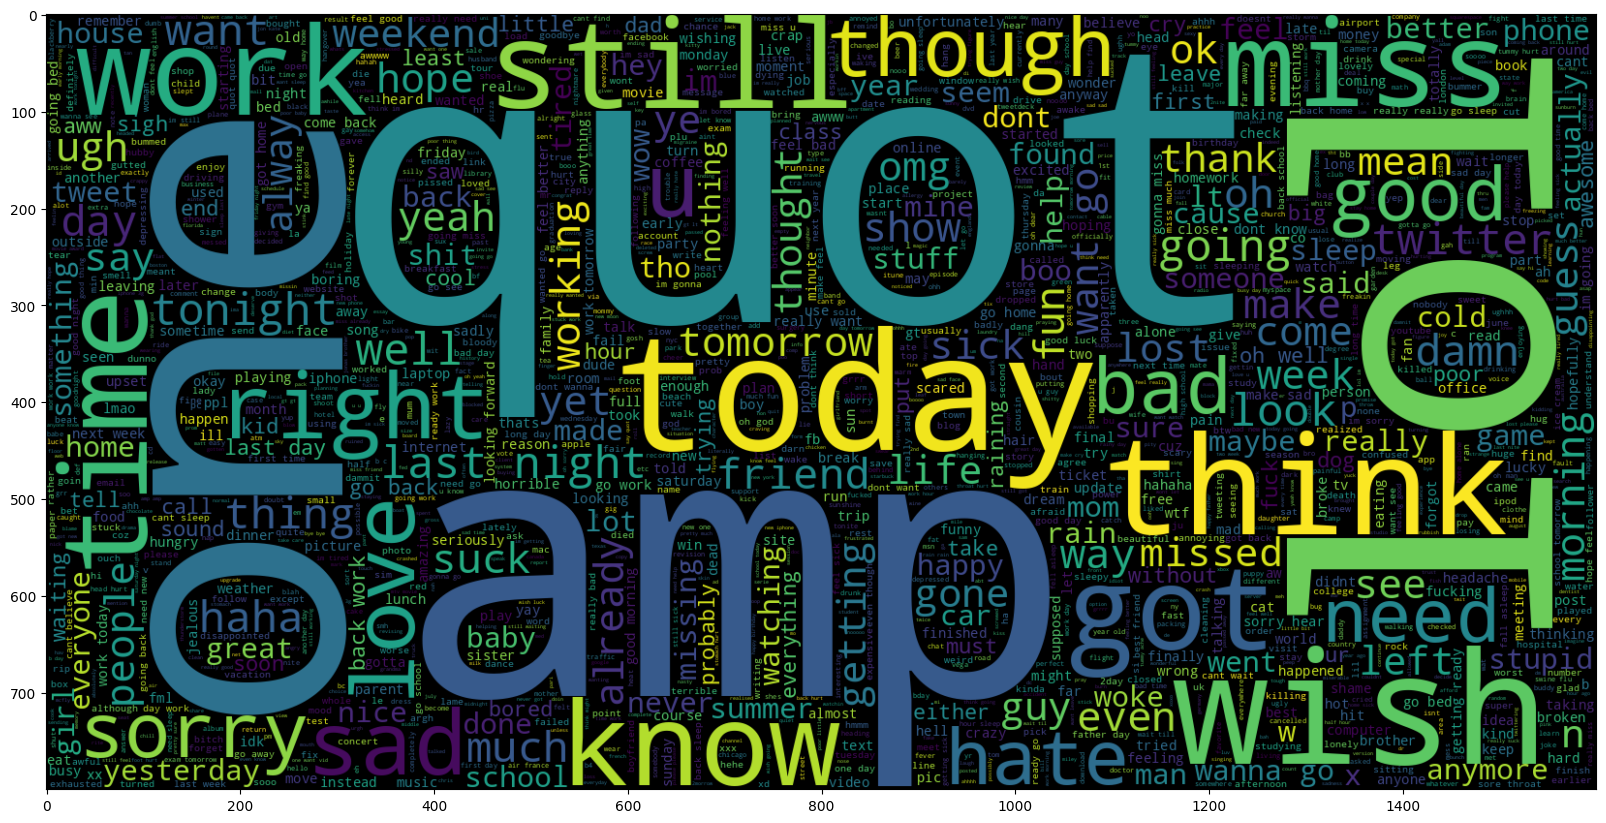

In [17]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.polarity == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Fonction de création de tokens

In [18]:
def word_tokenize(doc):
    tokens = word_tokenize(doc)
    return tokens

def byte_pair_tokenize(doc):
    enc = tiktoken.encoding_for_model("gpt-4")
    tokens = enc.encode(doc)
    return [str(token) for token in tokens]

In [19]:
df

,polarity,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save 50 rest go b...
3,0,whole body feel itchy like fire
4,0,behaving mad see
...,...,...
1599995,4,woke school best feeling ever
1599996,4,thewdb com cool hear old walt interview
1599997,4,ready mojo makeover ask detail
1599998,4,happy 38th birthday boo alll time tupac amaru ...


# Feed Forward Neural Networks

In [25]:
# Shuffling the data
df = df.sample(frac=1).reset_index(drop=True)
df

,polarity,text
0,4,hey tom go watch hbp released love singapore
1,0,mario extremely rude weekend think love gone
2,4,3 1 hate gonna come dear lovely book
3,0,thought forwarded confirmation website went ge...
4,4,wooohoo mtv movie award today wait
...,...,...
1599995,4,justallein reading
1599996,0,man want get friggin northeast might cool rain...
1599997,0,coming houston month different promoter postin...
1599998,0,still pretty insanely pissed nugget getting as...


In [28]:
# Categorizing the data
df['polarity'] = df['polarity'].replace(4, 1)

In [36]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)

In [37]:
display(df_train)
print("\n\n=====\n\n")
display(df_test)

,polarity,text
416824,0,dang suck need get together go
62426,1,working lot office
212737,0,go
889965,0,text working day im sorry
354315,1,got plane im florida
...,...,...
347822,0,uugh horrible
1109139,0,yet
916149,1,taylor swift belong love music video love luca...
1361274,1,lol




=====




,polarity,text
625000,1,even though dont update thinger alot still twi...
1310058,1,indeed wonderful state enjoyed greatkydebate
584978,0,leaving work hungwy
105573,1,ashsimpsonwentz happy anniversary well two gre...
168799,0,yes state art dr rock away pre diabetis insuli...
...,...,...
193483,0,oh poor silky sorry hear exciting got new pupp...
1570594,0,bugger get something car take work something p...
801570,0,saw flickr site sad pic beautifully captured t...
994326,1,wedding mint mom one woman party


In [38]:
# Making the training and test sets.

train_data = df_train['text'].copy()
train_target = df_train['polarity'].copy()

test_data = df_test['text'].copy()
test_target = df_test['polarity'].copy()

## Data Analysis

In [45]:
print("The output categories are", np.unique(train_target))
print("The number of unique words is", len(np.unique(np.hstack(df['text']))))

The output categories are [0 1]
The number of unique words is 1480420


In [57]:
print(f"% of negative in test set : {round(len(test_target[test_target == 0]) * 100 / len(test_target), 2)}%")
print(f"% of positive in test set : {round(len(test_target[test_target == 1]) * 100 / len(test_target), 2)}%")

print("\n\n=====\n\n")

print(f"% of negative in train set : {round(len(train_target[train_target == 0]) * 100 / len(train_target), 2)}%")
print(f"% of positive in train set : {round(len(train_target[train_target == 1]) * 100 / len(train_target), 2)}%")

# ==> balanced repartition, good.

% of negative in test set : 50.18%
% of positive in test set : 49.82%


=====


% of negative in train set : 49.96%
% of positive in train set : 50.04%
